## Plot DOA angle

-77.0053832080835
135.0 -77.0053832080835


<AxesSubplot:>

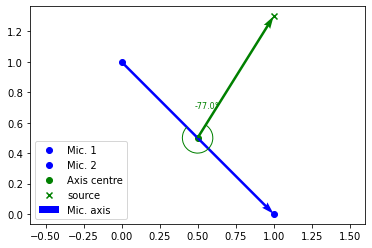

In [1]:
import sys
sys.path.append("..")
from tdoa.math_utils import compute_doa, compute_angle_between_vectors

import matplotlib.pyplot as plt
import numpy as np

from matplotlib.patches import Arc


def plot_vector(start, end, ax, **qwargs):
    direction = end - start
    ax.quiver(start[0], start[1], direction[0], direction[1],
              scale_units='xy', scale=1, **qwargs)
    return ax
    

def plot_points(m1, m2, s, array_centre, ax):
    points = [m1, m2, array_centre]
    labels = ["Mic. 1", "Mic. 2", "Axis centre"]
    colors = ["blue", "blue", "g", "r"]
    
    for point, label, color in zip(points, labels, colors):
        ax.scatter(point[0], point[1], label=label, color=color)
    
    ax.scatter(s[0], s[1], label="source", color="g", marker="x")
    return ax


def plot_angle(m1, m2, array_centre, angle_value, ax, radius=0.2):
    theta = np.linspace(0, 2*np.pi, 100)

    x1 = radius * np.cos(theta) + array_centre[0]
    x2 = radius * np.sin(theta) + array_centre[1]
    
    # Angle the microphone array makes with the x axis
    mic_array_angle = compute_angle_between_vectors(np.array([1, 0]),
                                                    m1 - m2,
                                                    radians=False)
    
    arc = Arc(array_centre, radius, radius, angle=mic_array_angle,
              theta2=angle_value, color="g")
    
    text_angle = (mic_array_angle + angle_value/2)*np.pi/180
    print(mic_array_angle, angle_value)
    
    mid_angle_x = array_centre[0] + (radius)*np.cos(text_angle)#+ (radius+0.45) * np.cos(mid_angle)
    mid_angle_y = array_centre[1] + (radius)*np.sin(text_angle)#+ (radius+0.45) * np.sin(mid_angle)
    ax.text(mid_angle_x, mid_angle_y, "{:.1f}°".format(angle_value), fontsize=8, color="g")
    ax.add_patch(arc)
    
    return ax


def plot_doa(m1, m2, s, output_path=None, ax=None):
    if ax is None:
        _, ax = plt.subplots()
    
    m1 = np.array(m1)
    m2 = np.array(m2)
    s = np.array(s)
    array_centre = (m1 + m2)/2
    doa = compute_doa(m1, m2, s, radians=False)
    print(doa)
    
    plot_points(m1, m2, s, array_centre, ax)
        
    plot_vector(m1, m2, ax, label="Mic. axis", color="b")
    plot_vector(array_centre, s, ax, color="g")
    
    plot_angle(m1, m2, array_centre, doa, ax)
    
    ax.legend()
    ax.axis('equal')

    return ax

m1 = [0, 1]
m2 = [1, 0]
s = [1, 1.3]
plot_doa(m1, m2, s)
    

Text(0.5, 1.0, 'How to plot an angle with matplotlib ?')

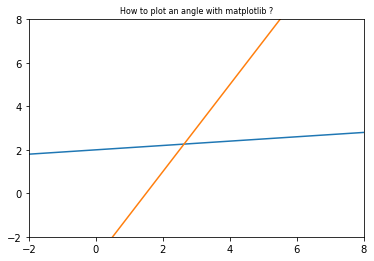

In [2]:
import matplotlib.pyplot as plt
import numpy as np

m1, b1 = 0.1, 2.0 # slope & intercept (line 1)
m2, b2 = 2.0, -3.0 # slope & intercept (line 2)

x = np.linspace(-10,10,500)

plt.plot(x,x*m1+b1)
plt.plot(x,x*m2+b2)

plt.xlim(-2,8)
plt.ylim(-2,8)

plt.title('How to plot an angle with matplotlib ?', fontsize=8)

#plt.savefig("plot_an_angle_matplotlib_01.png", bbox_inches='tight')

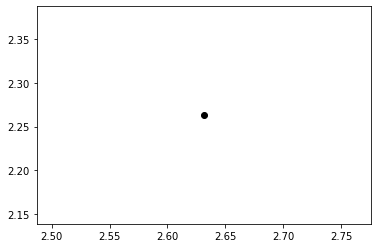

In [3]:
x0 = (b2-b1) / (m1-m2)
y0 = m1 * x0 + b1

plt.scatter(x0,y0, color='black' )

#plt.savefig("plot_an_angle_matplotlib_02.png", bbox_inches='tight')

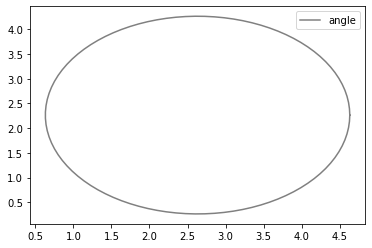

In [4]:
theta = np.linspace(0, 2*np.pi, 100)

r = np.sqrt(4.0) # circle radius

x1 = r * np.cos(theta) + x0
x2 = r * np.sin(theta) + y0

plt.plot(x1, x2, color='gray', label="angle")
plt.legend()

#plt.savefig("plot_an_angle_matplotlib_03.png", bbox_inches='tight')|